**EMOTION DETECTION**

In [6]:
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline
import cv2
import random
import os

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [9]:
from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.18.0


**Exploring Dataset**


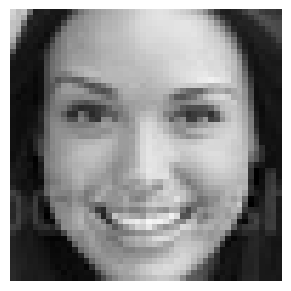

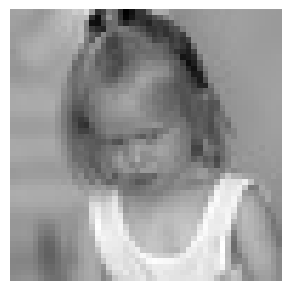

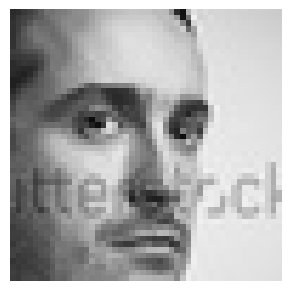

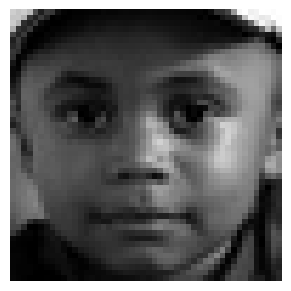

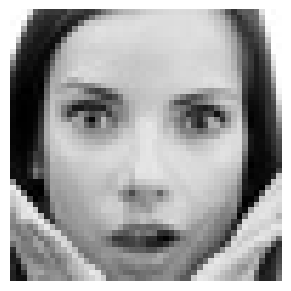

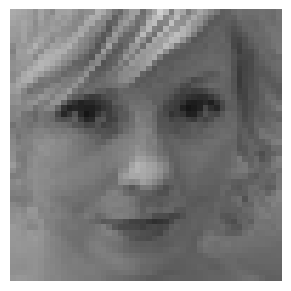

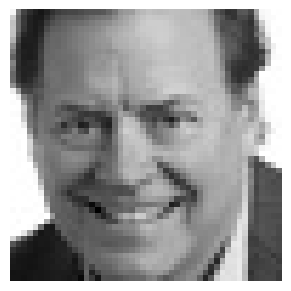

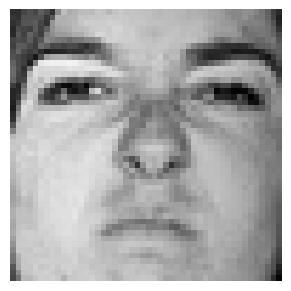

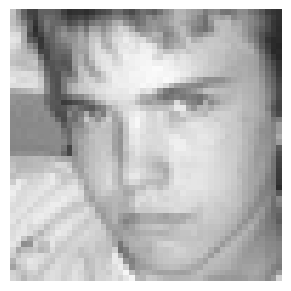

In [17]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image)); plt.axis('off')

**PREPARING DATA FOR TRAINING**

In [55]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**DEFINING MODEL**

In [58]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x
    

In [60]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [62]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,64,(3,3))
    conv_2 = Convolution(conv_1,128,(5,5))
    conv_3 = Convolution(conv_2,512,(3,3))
    conv_4 = Convolution(conv_3,512,(3,3))

    flatten = Flatten()(conv_4)
    
    dense_1 = Dense_f(flatten,256)
    dense_2 = Dense_f(dense_1,512)

    output  = Dense(7, activation="softmax")(dense_2)
    model  =  Model(inputs=[inputs],outputs = [output])

    opt = Adam(learning_rate=0.0005)
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [64]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

**Initializing the Model**

In [113]:
# epochs = 15
# #steps_per_epoch = train_generator.n // train_generator.batch_size
# #validation_steps = validation_generator.n // validation_generator.batch_size
# steps_per_epoch = train_generator.samples // train_generator.batch_size
# validation_steps = validation_generator.samples // validation_generator.batch_size

# checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
# reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.00001)
# callbacks = [checkpoint, reduce_lr]

epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint(
    "model_weights.keras",  # Save the entire model
    monitor='val_accuracy',
    save_weights_only=False,  # Save the full model
    mode='max',
    verbose=1
)
callbacks = [checkpoint]
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.00001)
callbacks = [checkpoint, reduce_lr]

In [115]:
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")

Training samples: 28709
Validation samples: 7178
Steps per epoch: 448
Validation steps: 112


**Traning the Model**

In [117]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=min(len(train_generator), steps_per_epoch),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=min(len(validation_generator), validation_steps),
    callbacks=callbacks
)


Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 758ms/step - accuracy: 0.6559 - loss: 0.9131
Epoch 1: saving model to model_weights.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 366s 818ms/step - accuracy: 0.6559 - loss: 0.9131 - val_accuracy: 0.6239 - val_loss: 1.0123 - learning_rate: 1.0000e-05
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 4:58 669ms/step - accuracy: 0.6719 - loss: 0.8543
Epoch 2: saving model to model_weights.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.6719 - loss: 0.8543 - val_accuracy: 0.6237 - val_loss: 1.0121 - learning_rate: 1.0000e-05
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.6606 - loss: 0.9116
Epoch 3: saving model to model_weights.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 326s 727ms/step - accuracy: 0.6606 - loss: 0.9116 - val_accuracy: 0.6223 - val_loss: 1.0089 - learning_rate: 1.0000e-05
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 5:38 758ms/step - accuracy: 0.7969 - loss: 0.6424
Epoch 4: saving model to model_weights.keras
448/448 ━━━━━━━━━━━

**Model Evaluation**

In [118]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step - accuracy: 0.6220 - loss: 1.0156


[1.006050705909729, 0.6283087134361267]

**Plotting Loss**

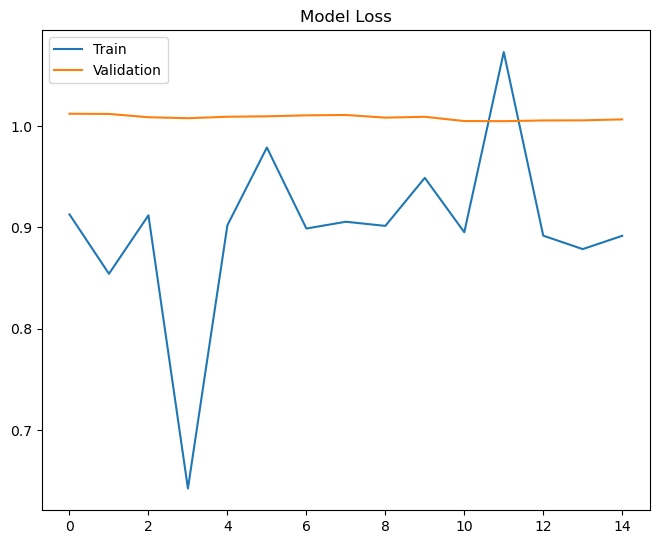

In [121]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

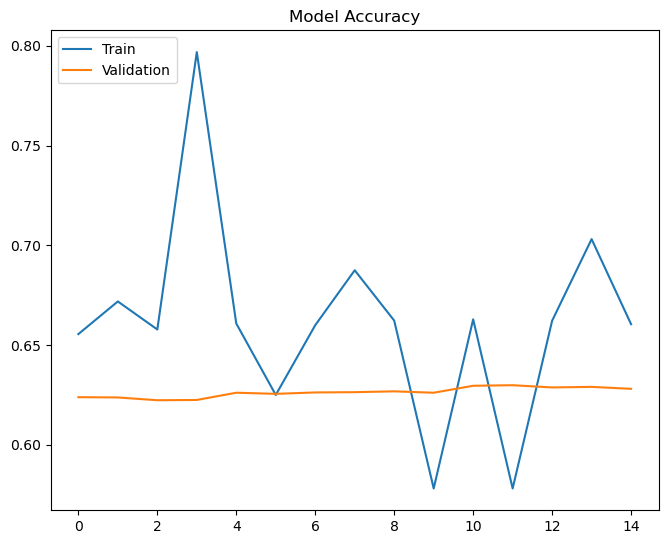

In [123]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [129]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)